# Diabetes Prediction (Random Forest)

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from pickle import dump

In [2]:
# Load data
df = pd.read_csv('../data/processed/diabetes_clean.csv')

# Split data into train and test sets
df_train, df_test = train_test_split(df, test_size=0.1, stratify=df['outcome'], random_state=2025)

# Reset index
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Split features and target
X_train = df_train.drop(columns=['outcome'])
y_train = df_train['outcome']

X_test = df_test.drop(columns=['outcome'])
y_test = df_test['outcome']

# Encode target
encoder = LabelEncoder()

y_train_enc = encoder.fit_transform(y_train)
y_test_enc = encoder.transform(y_test)

In [6]:
# Machine learning model
rforest = RandomForestClassifier(class_weight='balanced', random_state=2025)
rforest.fit(X_train, y_train_enc)
y_pred = rforest.predict(X_test)

'Accuracy score:'

0.8051948051948052

'              precision    recall  f1-score   support\n\n    diabetes       0.75      0.67      0.71        27\n no_diabetes       0.83      0.88      0.85        50\n\n    accuracy                           0.81        77\n   macro avg       0.79      0.77      0.78        77\nweighted avg       0.80      0.81      0.80        77\n'

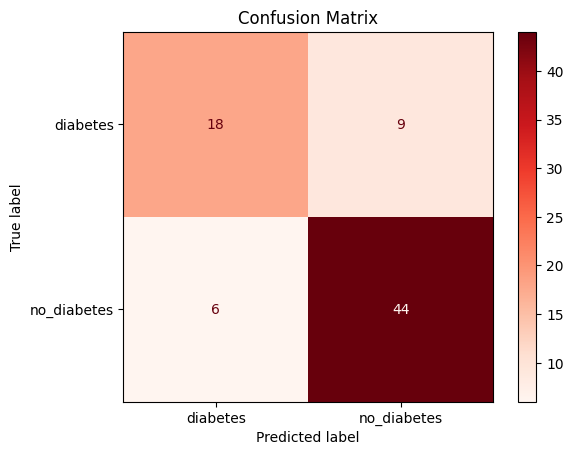

In [7]:
# Accuracy and classification report
display('Accuracy score:', accuracy_score(y_test_enc, y_pred))
display(classification_report(y_test_enc, y_pred, target_names=df['outcome'].unique()))

cm = confusion_matrix(y_test_enc, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['outcome'].unique())
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

This model performs better than both the raw and the optimized decision trees evaluated earlier. It achieves an accuracy of 0.80 and recall of 0.67 on the *diabetes* class, a notable improvement over the raw tree model, which only reached a recall of 0.44. In addition, its F1-score is slightly higher than that of the hyperparameter-tuned tree.

The *no_diabetes* class improved its recall by 0.01 (comparing with decision trees) but is still keeping strong scores and metrics. 

In [8]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rforest_cv = GridSearchCV(
    rforest,
    param_grid=param_grid,
    cv=5
)

rforest_cv.fit(X_train, y_train_enc)

rforest_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

'Accuracy score:'

0.8051948051948052

'              precision    recall  f1-score   support\n\n    diabetes       0.71      0.74      0.73        27\n no_diabetes       0.86      0.84      0.85        50\n\n    accuracy                           0.81        77\n   macro avg       0.79      0.79      0.79        77\nweighted avg       0.81      0.81      0.81        77\n'

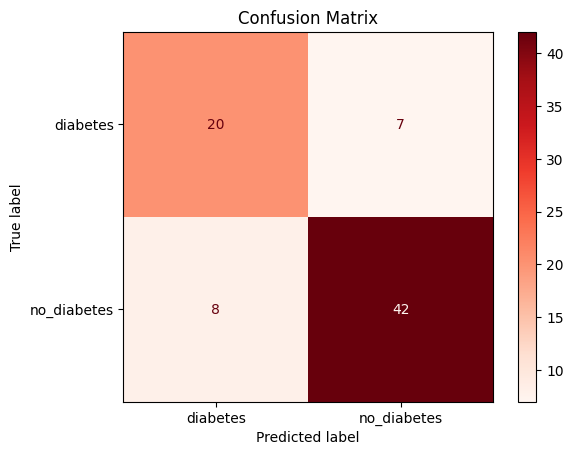

In [9]:
# Accuracy and classification report
y_pred = rforest_cv.predict(X_test)

display('Accuracy score:', accuracy_score(y_test_enc, y_pred))
display(classification_report(y_test_enc, y_pred, target_names=df['outcome'].unique()))

cm = confusion_matrix(y_test_enc, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['outcome'].unique())
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

This model has almost the same accuracy as before, but it has improved its diabetes recall by 0.07. The precision decreased by 0.04, but since the main goal was to improve recall, this is hence an acceptable trade off. As a result, F1 score increased by 0.02, reaching 0.73.

For the *no_diabetes* class, recall declined slightly compared to the raw model, however, the gain in precission balanced its performance, keeping the F1 score steady at 0.85.

In [10]:
# Save models
dump(rforest, open('../models/rforest_model_raw.sav', 'wb'))
dump(rforest_cv, open('../models/rforest_tuned_model.sav', 'wb'))